# 1. Interactive Map with State Population (no Slider)

##### Download the US States map shape file from the US Census site
https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html

In [1]:
# Import geopandas package
import geopandas as gpd

In [2]:
# Read in shapefile and examine data
contiguous_usa = gpd.read_file('us-states-shape/cb_2018_us_state_20m.shp')
contiguous_usa.head()

STATEFP   STATENS     AFFGEOID GEOID STUSPS          NAME LSAD  \
0      24  01714934  0400000US24    24     MD      Maryland   00   
1      19  01779785  0400000US19    19     IA          Iowa   00   
2      10  01779781  0400000US10    10     DE      Delaware   00   
3      39  01085497  0400000US39    39     OH          Ohio   00   
4      42  01779798  0400000US42    42     PA  Pennsylvania   00   

          ALAND       AWATER  \
0   25151100280   6979966958   
1  144661267977   1084180812   
2    5045925646   1399985648   
3  105828882568  10268850702   
4  115884442321   3394589990   

                                            geometry  
0  MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ...  
1  POLYGON ((-96.62187 42.77925, -96.57794 42.827...  
2  POLYGON ((-75.77379 39.72220, -75.75323 39.757...  
3  MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ...  
4  POLYGON ((-80.51989 40.90666, -80.51964 40.987...

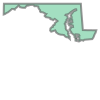

In [3]:
# display MaryLand state
contiguous_usa.iloc[0]['geometry']

In [4]:
# Show the polygon's that make up the MaryLand state.
str(contiguous_usa.iloc[0]['geometry'])

'MULTIPOLYGON (((-76.04621299999999 38.025533, -76.00733699999999 38.036706, -75.98008899999999 38.004891, -75.98464799999999 37.938121, -76.04652999999999 37.953586, -76.04621299999999 38.025533)), ((-79.48437199999999 39.3443, -79.482366 39.531689, -79.47666199999999 39.721078, -79.3924584050224 39.7214393586401, -79.045576 39.722928, -78.9284161298889 39.7229985874409, -78.80829952962159 39.7230709562769, -78.723578 39.723122, -78.380477064564 39.72270413884, -78.34283351857439 39.7226582929265, -78.34259299999999 39.722658, -78.09897069616669 39.72246619442809, -78.075861 39.722448, -77.76864399999999 39.721538, -77.469274 39.720229, -77.4691450036804 39.72022900225, -77.45943341952389 39.72022917164499, -77.23994999999999 39.720233, -77.21702375523739 39.7202172483854, -76.9993180263332 39.7200676723526, -76.991062 39.720062, -76.7870971997576 39.72104814611129, -76.71577099999999 39.721393, -76.5694491257313 39.7214585707527, -76.41897999999999 39.721526, -76.2396837411146 39.721

##### Download 2018 US population estimates by state
https://www.census.gov/newsroom/press-kits/2018/pop-estimates-national-state.html

In [5]:
# Read in state population data and examine
import pandas as pd

In [6]:
state_pop = pd.read_csv('data-us-pop/SCPRC-EST2018-18+POP-RES.csv')
state_pop.head()

SUMLEV REGION DIVISION  STATE           NAME  POPESTIMATE2018  \
0      10      0        0      0  United States        327167434   
1      40      3        6      1        Alabama          4887871   
2      40      4        9      2         Alaska           737438   
3      40      4        8      4        Arizona          7171646   
4      40      3        7      5       Arkansas          3013825   

   POPEST18PLUS2018  PCNT_POPEST18PLUS  
0         253768092               77.6  
1           3798031               77.7  
2            553622               75.1  
3           5528989               77.1  
4           2310645               76.7

In [7]:
# Merge shapefile with population data
pop_states = contiguous_usa.merge(state_pop, left_on = 'NAME', right_on = 'NAME')

In [8]:
# Drop Alaska and Hawaii
pop_states = pop_states.loc[~pop_states['NAME'].isin(['Alaska', 'Hawaii'])]

In [9]:
pop_states.head()

STATEFP   STATENS     AFFGEOID GEOID STUSPS          NAME LSAD  \
0      24  01714934  0400000US24    24     MD      Maryland   00   
1      19  01779785  0400000US19    19     IA          Iowa   00   
2      10  01779781  0400000US10    10     DE      Delaware   00   
3      39  01085497  0400000US39    39     OH          Ohio   00   
4      42  01779798  0400000US42    42     PA  Pennsylvania   00   

          ALAND       AWATER  \
0   25151100280   6979966958   
1  144661267977   1084180812   
2    5045925646   1399985648   
3  105828882568  10268850702   
4  115884442321   3394589990   

                                            geometry  SUMLEV REGION DIVISION  \
0  MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ...      40      3        5   
1  POLYGON ((-96.62187 42.77925, -96.57794 42.827...      40      2        4   
2  POLYGON ((-75.77379 39.72220, -75.75323 39.757...      40      3        5   
3  MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ...      40      2        3   
4  POLYGON ((-80.51989 40.90666, -80.51964 40.987...      40      1        2   

   STATE  POPESTIMATE2018  POPEST18PLUS2018  PCNT_POPEST18PLUS  
0     24          6042718           4702570               77.8  
1     19          3156145           2425378               76.8  
2     10           967171            763555               78.9  
3     39         11689442           9096117               77.8  
4     42         12807060          10158149               79.3

# Create Visualization with State Population

In [10]:
# Import all visual modules
import json
from bokeh.io import show
from bokeh.models import (CDSView, ColorBar, ColumnDataSource,
                          CustomJS, CustomJSFilter, 
                          GeoJSONDataSource, HoverTool,
                          LinearColorMapper, Slider)
from bokeh.layouts import column, row, widgetbox
from bokeh.palettes import brewer
from bokeh.plotting import figure

In [11]:
from bokeh.io import output_notebook

In [12]:
output_notebook()

Loading BokehJS ...

In [13]:
# Input GeoJSON source that contains features for plotting
geosource = GeoJSONDataSource(geojson = pop_states.to_json())

In [14]:
# Now that the data has been converted to the appropriate format, 
# we can plot the map of state populations using the following steps:

In [15]:
# Create figure object.
p = figure(title = 'US Population, 2018', 
           plot_height = 600 ,
           plot_width = 950, 
           toolbar_location = 'below',
           tools = "pan, wheel_zoom, box_zoom, reset")
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

In [16]:
# Add patch renderer to figure.
states = p.patches('xs','ys', source = geosource,
                   fill_color = None,
                   line_color = 'gray', 
                   line_width = 0.25, 
                   fill_alpha = 1)

In [17]:
# Create hover tool
p.add_tools(HoverTool(renderers = [states],
                      tooltips = [('State','@NAME'),
                                ('Population','@POPESTIMATE2018')]))

In [18]:
show(p)

In [19]:
# add a color bar that will indicate the state population

In [20]:
# Define color palettes
palette = brewer['BuGn'][8]
palette = palette[::-1] # reverse order of colors so higher values have darker colors

In [21]:
# Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 40000000)

In [22]:
# Define custom tick labels for color bar.
tick_labels = {'0': '0', '5000000': '5,000,000',
 '10000000':'10,000,000', '15000000':'15,000,000',
 '20000000':'20,000,000', '25000000':'25,000,000',
 '30000000':'30,000,000', '35000000':'35,000,000',
 '40000000':'40,000,000+'}

In [23]:
# Create color bar.
color_bar = ColorBar(color_mapper = color_mapper, 
                     label_standoff = 8,
                     width = 500, height = 20,
                     border_line_color = None,
                     location = (0,0), 
                     orientation = 'horizontal',
                     major_label_overrides = tick_labels)

In [24]:
# Create figure object.
p = figure(title = 'US Population, 2018', 
           plot_height = 600, plot_width = 950, 
           toolbar_location = 'below',
           tools = "pan, wheel_zoom, box_zoom, reset")
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

In [25]:
# Add patch renderer to figure.
states = p.patches('xs','ys', source = geosource,
                   fill_color = {'field' :'POPESTIMATE2018',
                                 'transform' : color_mapper},
                   line_color = 'gray', 
                   line_width = 0.25, 
                   fill_alpha = 1)

In [26]:
# Create hover tool
p.add_tools(HoverTool(renderers = [states],
                      tooltips = [('State','@NAME'),
                               ('Population', '@POPESTIMATE2018')]))

In [27]:
# Specify layout
# p.add_layout(color_bar, ‘below’)
show(p)

# 2. Interactive Map of Water Data Overlaying State Population (with Slider)

##### Download US Lead Levels dataset
https://www.waterqualitydata.us/

In [28]:
sites_df = pd.read_csv('data-us-water/sites_2018.csv')
lead_samples = pd.read_csv('data-us-water/lead_samples_2018.csv')

/Users/sbalak/miniconda/envs/gis/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (8,10,18,21,27,28,29,32,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/sbalak/miniconda/envs/gis/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (12,23,24,25,42,59,61) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [29]:
# Originally 43,010 sites
sites_subset = sites_df[['MonitoringLocationIdentifier', 'MonitoringLocationName',
                      'MonitoringLocationTypeName', 'LatitudeMeasure',
                      'LongitudeMeasure', 'StateCode', 'CountyCode']]
sites_subset.shape

(43010, 7)

In [30]:
# After dropping duplicates, 42,975 sites
sites_no_dup = sites_subset.drop_duplicates('MonitoringLocationIdentifier')
sites_no_dup.shape

(42975, 7)

In [31]:
# Originally 31,604 data points
lead_tests = lead_samples[['OrganizationIdentifier', 'OrganizationFormalName',
                           'ActivityIdentifier', 'ActivityTypeCode', 'ActivityMediaName', 'ActivityStartDate',
                           'MonitoringLocationIdentifier', 'ProjectIdentifier',
                           'SampleCollectionMethod/MethodIdentifier', 'SampleCollectionMethod/MethodName',
                           'CharacteristicName', 'ResultMeasureValue', 'ResultMeasure/MeasureUnitCode',
                           'ResultStatusIdentifier', 'ResultValueTypeName', 'PrecisionValue',
                           'ResultAnalyticalMethod/MethodIdentifier',
                           'ResultAnalyticalMethod/MethodIdentifierContext', 'ResultAnalyticalMethod/MethodName',
                           'DetectionQuantitationLimitTypeName', 'DetectionQuantitationLimitMeasure/MeasureValue',
                           'DetectionQuantitationLimitMeasure/MeasureUnitCode', 'ProviderName']]
lead_tests.shape

(31604, 23)

In [32]:
# After dropping n/a 16,637 data points
lead_tests_dropna = lead_tests[pd.notnull(lead_tests['ResultMeasureValue'])]
print(lead_tests_dropna.shape)

lead_levels = []
for x in list(lead_tests_dropna['ResultMeasureValue']):
    try:
        lead = float(x)
    except ValueError:
        lead = 'Not precise'
    lead_levels.append(lead)

lead_tests_dropna['LeadValue'] = lead_levels

# Drop where there is no lead_sites, 16,260 data points
lead_found = lead_tests_dropna[lead_tests_dropna['LeadValue'] != 'Not precise']

# Drop where lead was 0 ug/l, 14,934 data points
lead_found = lead_found[lead_found['LeadValue'] > 0]
print(lead_found.shape)

(16637, 23)
(14934, 24)


/Users/sbalak/miniconda/envs/gis/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [33]:
# Subset where units are ug/l or mg/l, 14,328 data points
lead_per_l = lead_found[lead_found['ResultMeasure/MeasureUnitCode'].isin(['ug/l', 'mg/l'])]

lead_ug_per_l = []
units = list(lead_per_l['ResultMeasure/MeasureUnitCode'])
levels = list(lead_per_l['LeadValue'])
for i in range(0, len(lead_per_l)):
    if units[i] == 'mg/l':
        lead_ug_per_l.append(levels[i] * 1000)
    else:
        lead_ug_per_l.append(levels[i])

lead_per_l['LeadValue_ug_l'] = lead_ug_per_l
lead_per_l.shape

/Users/sbalak/miniconda/envs/gis/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


(14328, 25)

# Merge Water Data with Geometry

In [34]:
# Get rid of points with no results for lead, or 0 ug/l of lead. 
# In this case, we only want to plot sites where the test was measured in ug/l or mg/l. 
# We convert the mg/l to ug/l to have consistent units.

# After cleaning the data, we can merge the water sites with the lead samples. 
# Then we sort the sites, drop any duplicates, matching on both the site and the day. 
# Then we can subset for water sites that are within the contiguous USA based on latitude and longitude. 
# We then create a month column for plotting purposes. 
# Finally, we create a geometry row by creating shapely geometry Point objects

In [35]:
# Merge lead levels with site location
lead_sites = lead_per_l.merge(sites_no_dup,
                              left_on = 'MonitoringLocationIdentifier',
                              right_on = 'MonitoringLocationIdentifier')

# Sort by testing date
lead_sites_sorted = lead_sites.sort_values(by = 'ActivityStartDate')
print(lead_sites_sorted.shape)
lead_sites_sorted.head()

(14328, 31)


OrganizationIdentifier                  OrganizationFormalName  \
733                 USGS-CT   USGS Connecticut Water Science Center   
6580             21IOWA_WQX  Iowa DNR Surface Water Monitoring Data   
6615             21IOWA_WQX  Iowa DNR Surface Water Monitoring Data   
6575             21IOWA_WQX  Iowa DNR Surface Water Monitoring Data   
6565             21IOWA_WQX  Iowa DNR Surface Water Monitoring Data   

                        ActivityIdentifier ActivityTypeCode ActivityMediaName  \
733                     nwisma.01.01800241   Sample-Routine             Water   
6580  21IOWA_WQX-AMBIENT-SHL-606127-MET-SW   Sample-Routine             Water   
6615  21IOWA_WQX-AMBIENT-SHL-606126-MET-SW   Sample-Routine             Water   
6575  21IOWA_WQX-AMBIENT-SHL-606128-MET-SW   Sample-Routine             Water   
6565  21IOWA_WQX-AMBIENT-SHL-606124-MET-SW   Sample-Routine             Water   

     ActivityStartDate MonitoringLocationIdentifier ProjectIdentifier  \
733         2018-01-02                USGS-01127000               NaN   
6580        2018-01-02          21IOWA_WQX-10580003           AMBIENT   
6615        2018-01-02          21IOWA_WQX-10700001           AMBIENT   
6575        2018-01-02          21IOWA_WQX-10580002           AMBIENT   
6565        2018-01-02          21IOWA_WQX-10560002           AMBIENT   

     SampleCollectionMethod/MethodIdentifier  \
733                                       40   
6580                                  UHL001   
6615                                  UHL001   
6575                                  UHL001   
6565                                  UHL001   

                   SampleCollectionMethod/MethodName  ...  \
733                               Multiple verticals  ...   
6580  Standard UHL Sampling Procedure - Grab Samples  ...   
6615  Standard UHL Sampling Procedure - Grab Samples  ...   
6575  Standard UHL Sampling Procedure - Grab Samples  ...   
6565  Standard UHL Sampling Procedure - Grab Samples  ...   

     DetectionQuantitationLimitMeasure/MeasureUnitCode ProviderName LeadValue  \
733                                                NaN         NWIS     0.214   
6580                                              ug/l       STORET      0.08   
6615                                              ug/l       STORET       0.1   
6575                                              ug/l       STORET      0.05   
6565                                              ug/l       STORET      0.09   

     LeadValue_ug_l              MonitoringLocationName  \
733           0.214  QUINEBAUG RIVER AT JEWETT CITY, CT   
6580          0.080             Iowa River near Wapello   
6615          0.100         Cedar River near Conesville   
6575          0.050           Iowa River near Lone Tree   
6565          0.090            Skunk River near Augusta   

      MonitoringLocationTypeName LatitudeMeasure LongitudeMeasure StateCode  \
733                       Stream       41.597492       -71.984094       9.0   
6580                River/Stream       41.180331       -91.182147      19.0   
6615                River/Stream       41.409359       -91.290171      19.0   
6575                River/Stream       41.423865       -91.479090      19.0   
6565                River/Stream       40.753400       -91.275590      19.0   

     CountyCode  
733        11.0  
6580      115.0  
6615      139.0  
6575      103.0  
6565      111.0  

[5 rows x 31 columns]

In [36]:
# After dropping duplicates by date, 11,986 data points
lead_sites_dropdup = lead_sites_sorted.drop_duplicates(subset = ['MonitoringLocationIdentifier', 'ActivityStartDate'], keep = 'last').reset_index(drop = True)
print(lead_sites_dropdup.shape)

# Drop datapoints not in contiguous contiguous_usa, 10,078 data points
lead_sites_dropdup = lead_sites_dropdup[(lead_sites_dropdup['LongitudeMeasure'] <= -60) &
                                        (lead_sites_dropdup['LongitudeMeasure'] >= -130) &
                                        (lead_sites_dropdup['LatitudeMeasure'] <= 50) &
                                        (lead_sites_dropdup['LatitudeMeasure'] >= 20)]
print(lead_sites_dropdup.shape)

(11986, 31)
(10078, 31)


In [37]:
# Create Month column for plotting Slider
lead_sites_dropdup['Month'] = [int(x.split('-')[1]) for x in lead_sites_dropdup['ActivityStartDate']]

In [38]:
from shapely.geometry import Point

# Create shapely.Point objects based on longitude and latitude
geometry = []

for index, row in lead_sites_dropdup.iterrows():
    geometry.append(Point(row['LongitudeMeasure'], row['LatitudeMeasure']))

lead_sites_contig = lead_sites_dropdup.copy()
lead_sites_contig['geometry'] = geometry

# Save to dataframe
# lead_sites_contig.to_csv('lead_sites_contig_2018_per_l.csv')

# Final Version of Map with Lead Levels at Water Sites

In [39]:
# Input GeoJSON source that contains features for plotting
geosource = GeoJSONDataSource(geojson = pop_states.to_json())

# Read dataframe to geodataframe
lead_sites_crs = {'init': 'epsg:4326'}
lead_sites_geo = gpd.GeoDataFrame(lead_sites_contig,
                                  crs = lead_sites_crs,
                                  geometry = lead_sites_contig.geometry)

# Get x and y coordinates
lead_sites_geo['x'] = [geometry.x for geometry in lead_sites_geo['geometry']]
lead_sites_geo['y'] = [geometry.y for geometry in lead_sites_geo['geometry']]
p_df = lead_sites_geo.drop('geometry', axis = 1).copy()

sitesource = ColumnDataSource(p_df)

In [40]:
# Define color palettes
palette = brewer['BuGn'][8]
palette = palette[::-1] # reverse order of colors so higher values have darker colors

# Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 40000000)

# Define custom tick labels for color bar.
tick_labels = {'0': '0', '5000000': '5,000,000',
               '10000000':'10,000,000', '15000000':'15,000,000',
               '20000000':'20,000,000', '25000000':'25,000,000',
               '30000000':'30,000,000', '35000000':'35,000,000',
               '40000000':'40,000,000+'}

# Create color bar.
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
                     border_line_color=None,location = (0,0), orientation = 'horizontal',
                     major_label_overrides = tick_labels)

# Create figure object.
p = figure(title = 'Lead Levels in Water Samples, 2018', plot_height = 600 ,
           plot_width = 950, toolbar_location = 'below',
           tools = "pan, wheel_zoom, box_zoom, reset")
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

# Add patch renderer to figure.
states = p.patches('xs','ys', source = geosource,
                   fill_color = {'field' :'POPESTIMATE2018', 'transform' : color_mapper},
                   line_color = 'gray', line_width = 0.25, fill_alpha = 1)

# Make a slider object to toggle the month shown
slider = Slider(title = 'Month',start = 1, end = 12, step = 1, value = 1)

# This callback triggers the filter when the slider changes
callback = CustomJS(args=dict(source=sitesource), code="""
    source.change.emit();
""")
slider.js_on_change('value', callback)

# Creates custom filter that selects the rows of the month based on the value in the slider
custom_filter = CustomJSFilter(args=dict(slider=slider, source=sitesource), code='''
var indices = [];
// iterate through rows of data source and see if each satisfies some constraint
for (var i = 0; i < source.get_length(); i++){
    if (source.data['Month'][i] == slider.value){
        indices.push(true);
    } else {
        indices.push(false);
    }
}
return indices;
''')

view = CDSView(source=sitesource, filters=[custom_filter])

# Plots the water sampling sites based on month in slider
sites = p.circle('x', 'y', source = sitesource, color = 'red',
                 size = 5, alpha = 0.3, view = view)

# Create hover tool
p.add_tools(HoverTool(renderers = [states],
                      tooltips = [('State','@NAME'),('Population', '@POPESTIMATE2018')]))
p.add_tools(HoverTool(renderers = [sites],
                      tooltips = [('Organization', '@OrganizationFormalName'),
                                  ('Location Type', '@MonitoringLocationTypeName'),
                                  ('Date', '@ActivityStartDate'),
                                  ('Lead (ug/l)', '@LeadValue_ug_l')]))
# Specify layout
p.add_layout(color_bar, 'below')

# Make a column layout of widgetbox(slider) and plot, and add it to the current document
layout = column(p, widgetbox(slider))

show(layout)